# IPL ANALYSIS (2008-2019)

# IMPORTING

In [3]:
#Importing required libraries in python
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import bernoulli
import numpy as np
from scipy.stats import uniform
from scipy.integrate import quad
from scipy.stats import norm
from scipy import stats
from numpy import sqrt,abs,round
from sklearn.linear_model import LinearRegression
from math import sqrt

In [4]:
#Importing IPL datasets
deliveries = pd.read_csv (r'D:\Keethu\MSc data science\2nd sem\ipl project\deliveries.csv')
matches=pd.read_csv (r'D:\Keethu\MSc data science\2nd sem\ipl project\matches.csv')

# DATA CLEANING

In [5]:
#Data cleaning
deliveries=deliveries.replace('Rising Pune Supergiants','Rising Pune Supergiant')
matches=matches.replace('Rising Pune Supergiants','Rising Pune Supergiant')

deliveries=deliveries.replace('Deccan Chargers','Sunrisers Hyderabad')
matches=matches.replace('Deccan Chargers','Sunrisers Hyderabad')

deliveries=deliveries.replace('Delhi Daredevils','Delhi Capitals')
matches=matches.replace('Delhi Daredevils','Delhi Capitals')

deliveries.isna().any()
matches.isna().any()

id                 False
Season             False
city                True
date               False
team1              False
team2              False
toss_winner        False
toss_decision      False
result             False
dl_applied         False
winner              True
win_by_runs        False
win_by_wickets     False
player_of_match     True
venue              False
umpire1             True
umpire2             True
umpire3             True
dtype: bool

In [6]:
#filling empty cells
matches.info()
matches.loc[matches["city"].isna(),"city"]="Dubai"
matches.loc[matches["winner"].isna(),"winner"]="DRAW"
matches.loc[matches["player_of_match"].isna(),"player_of_match"]="No player_of_match"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

# AVERAGE RUNS PER MATCH (Player-wise)

In [7]:
#player-wise total runs
p_total=deliveries.groupby('batsman')['total_runs'].sum()
#player-wise total matches
p_matches=deliveries.groupby('batsman')['match_id'].nunique()
#player-wise average runs per match
p_avrg=p_total/p_matches
ply_average=p_avrg.sort_values(axis=0, ascending=False, kind='quicksort')
p_avrg=ply_average.head(20).to_frame()
p_avrg.columns=['Average runs']
p_avrg.reset_index()

,batsman,Average runs
0,J Bairstow,48.700000
1,DA Warner,39.484127
2,CH Gayle,39.298387
3,LMP Simmons,38.862069
4,SE Marsh,37.855072
5,ML Hayden,37.656250
6,HM Amla,37.500000
7,KL Rahul,35.982759
8,R Parag,35.600000
9,MEK Hussey,35.586207


In [8]:
stanlake=deliveries[deliveries['batsman'] =='B Stanlake'].groupby('batsman')['total_runs'].count()
stanlake

batsman
B Stanlake    2
Name: total_runs, dtype: int64

# AVERAGE RUNS PER MATCH (Team-wise)

In [9]:
#team-wise total runs
t_runs=deliveries.groupby('batting_team')['total_runs'].sum()
#team-wise total matches
t_matches=matches.groupby('team1')['team1'].count()+matches.groupby('team2')['team2'].count()

#team-wise average runs per match
t_mean=t_runs/t_matches

t_mean

batting_team
Chennai Super Kings            161.085366
Delhi Capitals                 152.644068
Gujarat Lions                  162.066667
Kings XI Punjab                158.482955
Kochi Tuskers Kerala           135.785714
Kolkata Knight Riders          154.039326
Mumbai Indians                 159.406417
Pune Warriors                  138.217391
Rajasthan Royals               152.591837
Rising Pune Supergiant         151.100000
Royal Challengers Bangalore    156.255556
Sunrisers Hyderabad            155.857923
dtype: float64

In [10]:
#team-wise total runs
t_runs=deliveries.groupby('batting_team')['total_runs'].sum()
#team-wise total matches
t_matches=matches.groupby('team1')['team1'].count()+matches.groupby('team2')['team2'].count()

#team-wise average runs per match
t_mean=t_runs/t_matches

t_mean

batting_team
Chennai Super Kings            161.085366
Delhi Capitals                 152.644068
Gujarat Lions                  162.066667
Kings XI Punjab                158.482955
Kochi Tuskers Kerala           135.785714
Kolkata Knight Riders          154.039326
Mumbai Indians                 159.406417
Pune Warriors                  138.217391
Rajasthan Royals               152.591837
Rising Pune Supergiant         151.100000
Royal Challengers Bangalore    156.255556
Sunrisers Hyderabad            155.857923
dtype: float64

# AVERAGE RUNS PER OVER (Player-wise)

In [11]:
#player-wise total runs
p_total=deliveries.groupby('batsman')['total_runs'].sum()
#player-wise total overs
p_overs=deliveries.groupby('batsman')['total_runs'].count()/6
#player-wise average runs per over
p_average=p_total/p_overs
p_average.sort_values(axis=0, ascending=False, kind='quicksort').head(40)

batsman
B Stanlake         15.000000
S Sharma           15.000000
Umar Gul           13.894737
KMDN Kulasekara    12.000000
RS Sodhi           12.000000
ER Dwivedi         11.600000
AD Russell         11.409714
Shahid Afridi      10.695652
SP Narine          10.677755
M Ali              10.655738
K Gowtham          10.604651
I Malhotra         10.500000
LJ Wright          10.476190
KK Cooper          10.457143
BCJ Cutting        10.397260
S Curran           10.363636
Rashid Khan        10.298507
SN Thakur          10.285714
H Brar             10.285714
CR Brathwaite      10.250000
Kamran Akmal       10.153846
N Pooran           10.145455
RR Pant            10.081522
VRV Singh          10.000000
Shivam Sharma      10.000000
J Bairstow          9.972696
S Rutherford        9.927273
GJ Maxwell          9.878049
BJ Haddin           9.818182
DL Chahar           9.782609
HH Pandya           9.782609
KJ Abbott           9.750000
AUK Pathan          9.692308
CH Morris           9.557522
LPC Si

# STANDARD DEVIATION (for runs scored by teams in each match)

In [12]:
#total runs scored by every team in each match from 2008-2020
each_match=deliveries.groupby(['match_id', 'batting_team'])[['total_runs']].sum()

#standard deviation for runs scored by teams in each match
deviation=each_match.groupby(['batting_team'])[['total_runs']].std()
deviation

,total_runs
batting_team,
Chennai Super Kings,30.855571
Delhi Capitals,33.098903
Gujarat Lions,24.819255
Kings XI Punjab,32.398761
Kochi Tuskers Kerala,30.038894
Kolkata Knight Riders,32.953548
Mumbai Indians,29.893459
Pune Warriors,25.318536
Rajasthan Royals,32.172355


# TOP 3 BATSMEN

In [13]:
#top 3 batsman based on total runs scored by batsMEN
p_total=deliveries.groupby('batsman')['total_runs'].sum()
p_total[np.argsort(p_total)[::-1]].head(3)

batsman
SK Raina     5651
V Kohli      5616
RG Sharma    5057
Name: total_runs, dtype: int64

# CORRELATION (between age and runs of batsman)

# Suresh Raina

In [14]:
#correlation for Raina
data1=[(22,440),(23,451),(24,570),(25,451),(26,460),(27,562),(28,542),(29,397),(30,418),(31,454),(32,487),(33,419)]
data_1=pd.DataFrame(data1,columns=["age","runs"])
data_1.corr()

,age,runs
age,1.000000,-0.239081
runs,-0.239081,1.000000


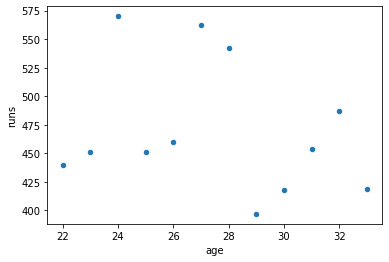

In [15]:
#scatter plot for Raina
data_1.plot(kind='scatter',x='age',y='runs')
plt.show()

# Virat Kohli

In [16]:
#correlation for Virat Kohli
data2=[(20,187),(21,258),(22,320),(23,584),(24,375),(25,660),(26,373),(27,519),(28,998),(29,314),(30,548),(31,480)]
data_2=pd.DataFrame(data2,columns=["age","runs"])
data_2.corr()

,age,runs
age,1.000000,0.461241
runs,0.461241,1.000000


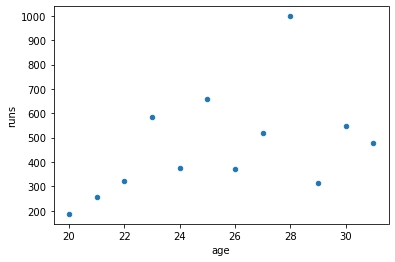

In [17]:
#scatter plot for Virat Kohli
data_2.plot(kind='scatter',x='age',y='runs')
plt.show()

# Rohit Sharma

In [18]:
#correlation for Rohit Sharma
data3=[(21,419),(22,379),(23,422),(24,382),(25,448),(26,548),(27,397),(28,492),(29,498),(30,349),(31,308),(32,415)]
data_3=pd.DataFrame(data3,columns=["age","runs"])
data_3.corr()

,age,runs
age,1.000000,-0.118744
runs,-0.118744,1.000000


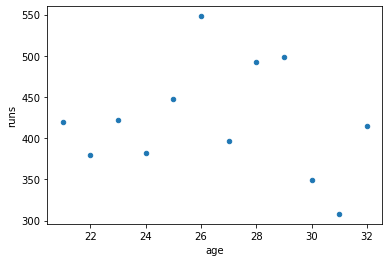

In [19]:
#scatter plot for Rohit Sharma
data_3.plot(kind='scatter',x='age',y='runs')
plt.show()

# REGRESSION (age and runs of batsman)

# Suresh Raina

In [20]:
#Suresh Raina
raina_age=[22,23,24,25,26,27,28,29,30,31,32,33]
raina_runs=[421,434,520,438,441,548,523,374,399,442,445,383]
raina1= pd.DataFrame(raina_age, index =[1,2,3,4,5,6,7,8,9,10,11,12],columns =['raina_age'])
raina2=pd.DataFrame(raina_runs, index =[1,2,3,4,5,6,7,8,9,10,11,12],columns =['raina_runs'])
regressor = LinearRegression()
regressor.fit(raina1,raina2)

#regression intercept
print(regressor.intercept_)

[570.98717949]


In [21]:
#regression coefficient
print(regressor.coef_)

[[-4.4965035]]


In [22]:
#predicted value
y=regressor.intercept_+(regressor.coef_*34)
y

array([[418.10606061]])

# Virat Kohli

In [23]:
virat_age=[20,21,22,23,24,25,26,27,28,29,30,31]
virat_runs=[165,246,307,557,364,634,359,505,973,308,530,464]
virat1= pd.DataFrame(virat_age, index =[1,2,3,4,5,6,7,8,9,10,11,12],columns =['virat_age'])
virat2=pd.DataFrame(virat_runs, index =[1,2,3,4,5,6,7,8,9,10,11,12],columns =['virat_runs'])
regressor = LinearRegression()
regressor.fit(virat1,virat2)

#regression intercept
print(regressor.intercept_)

[-269.41958042]


In [24]:
#regression coefficient
print(regressor.coef_)

[[28.25174825]]


In [25]:
#predicted value
y=(regressor.coef_*31)+regressor.intercept_
y

array([[606.38461538]])

# Rohit Sharma

In [26]:
#Rohit Sharma
rohit_age=[21,22,23,24,25,26,27,28,29,30,31,32]
rohit_runs=[404,362,404,372,433,538,390,482,489,333,286,405]
rohit1= pd.DataFrame(rohit_age, index =[1,2,3,4,5,6,7,8,9,10,11,12],columns =['rohit_age'])
rohit2=pd.DataFrame(rohit_runs, index =[1,2,3,4,5,6,7,8,9,10,11,12],columns =['rohit_runs'])
regressor = LinearRegression()
regressor.fit(rohit1,rohit2)

#regression intercept
print(regressor.intercept_)

[462.46386946]


In [27]:
#regression coefficient
print(regressor.coef_)

[[-2.04895105]]


In [28]:
#predicted value
y=(regressor.coef_*33)+regressor.intercept_
y

array([[394.84848485]])

# GRAPHICAL REPRESENTATION:

# TOP 10 PLAYERS OF MATCHES

In [29]:
#top 10 most-players of matches
pofmatch=matches['player_of_match'].value_counts()
pofmatch.head(10)

CH Gayle          21
AB de Villiers    20
MS Dhoni          17
DA Warner         17
RG Sharma         17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
AM Rahane         12
Name: player_of_match, dtype: int64

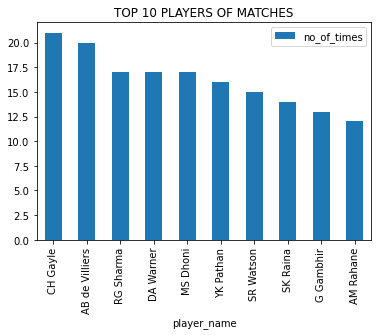

In [30]:
#Plotting top 10 players of matches in bar graph
plofmatch = {'player_name': ['CH Gayle','AB de Villiers','RG Sharma','DA Warner','MS Dhoni','YK Pathan','SR Watson','SK Raina'
                            ,'G Gambhir','AM Rahane'],
        'no_of_times': [21,20,17,17,17,16,15,14,13,12]}
  
pl_of_match= pd.DataFrame(plofmatch,columns=['player_name','no_of_times'])
pl_of_match.plot(x ='player_name', y='no_of_times', kind = 'bar')
plt.title("TOP 10 PLAYERS OF MATCHES")
plt.show()

# WINNING PERCENTAGE OF CSK(2008-19)

In [31]:
#win percentage of csk from 2008-2019
csk=matches[matches['winner'] == 'Chennai Super Kings'].groupby('Season')['winner'].count()/(matches[matches['team1'] == 'Chennai Super Kings'].groupby('Season')['team1'].count()+matches[matches['team2'] == 'Chennai Super Kings'].groupby('Season')['team2'].count())
csk*100

Season
2008    56.250000
2009    57.142857
2010    56.250000
2011    68.750000
2012    55.555556
2013    66.666667
2014    62.500000
2015    58.823529
2018    68.750000
2019    58.823529
dtype: float64

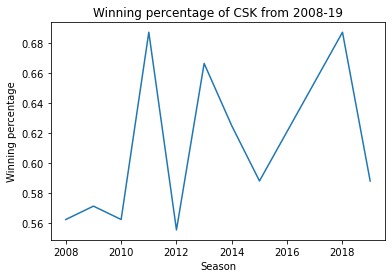

In [32]:
#plotting win percentage of csk from 2008-2019
plt.plot(csk)
plt.xlabel("Season")
plt.ylabel("Winning percentage")
plt.title("Winning percentage of CSK from 2008-19")
plt.show()

# AVERAGE RUNS IN EACH OVER(1-20)

In [33]:
#average runs scored in each over 1-20
runsperover=deliveries.groupby('over')['total_runs'].sum()/(deliveries.groupby('over')['over'].count()/6)
runsperover

over
1      5.876913
2      6.924826
3      7.722570
4      7.937094
5      7.978170
6      8.049753
7      6.517074
8      6.962283
9      7.232369
10     7.177918
11     7.491447
12     7.692409
13     7.740549
14     8.008242
15     8.304270
16     8.587376
17     8.975023
18     9.488256
19     9.790236
20    10.601069
dtype: float64

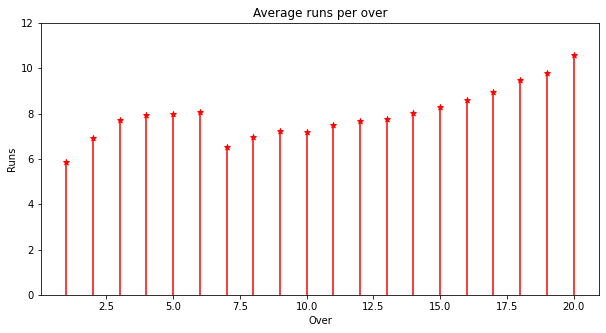

In [34]:
#Average runs in each over
fig=plt.figure(figsize=(10,5))
plt.ylim(0,12)
plt.vlines(runsperover.keys(),0,runsperover.values,color="red",linestyles='solid')
plt.scatter(runsperover.keys()[:20],runsperover, marker="*",color="red")
plt.title('Average runs per over')
plt.xlabel('Over')
plt.ylabel('Runs')
plt.show()

# TOTAL MATCHES IN EACH CITY

In [35]:
#total matches in each city
cities=matches[['city']].value_counts().sort_values()
cities

city          
Bloemfontein        2
Kimberley           3
East London         3
Nagpur              3
Kanpur              4
Kochi               5
Sharjah             6
Raipur              6
Abu Dhabi           7
Ranchi              7
Cape Town           7
Port Elizabeth      7
Cuttack             7
Dubai               7
Johannesburg        8
Dharamsala          9
Indore              9
Rajkot             10
Mohali             10
Centurion          12
Ahmedabad          12
Visakhapatnam      13
Bengaluru          14
Durban             15
Pune               38
Chandigarh         46
Jaipur             47
Chennai            57
Hyderabad          64
Bangalore          66
Delhi              74
Kolkata            77
Mumbai            101
dtype: int64

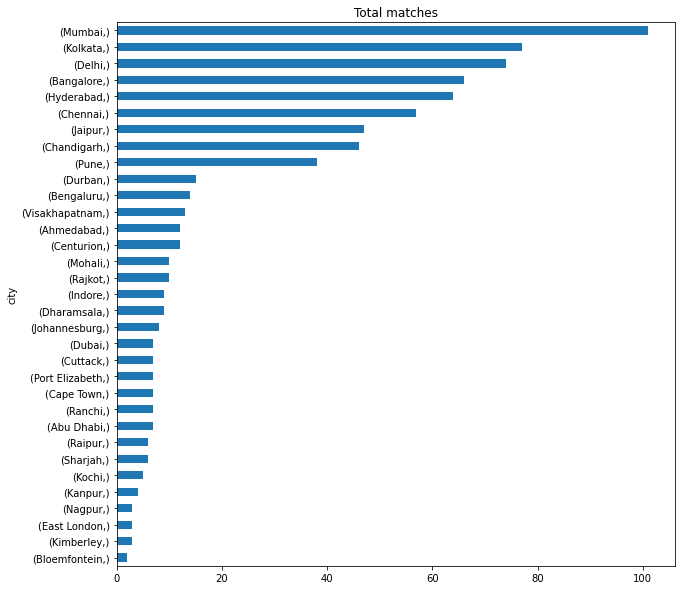

In [36]:
#plotting total matches in each city in horizontal bar graph
fig=plt.figure(figsize=(10,10))
cities.plot.barh()
plt.title("Total matches")
plt.show()

# TOTAL WINS BY EACH TEAM (2008-19)

In [37]:
#number of wins by each team
winsbyteam=matches['winner'].value_counts()
winsbyteam

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Sunrisers Hyderabad             87
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Delhi Capitals                  77
Rajasthan Royals                75
Rising Pune Supergiant          15
Gujarat Lions                   13
Pune Warriors                   12
Kochi Tuskers Kerala             6
DRAW                             4
Name: winner, dtype: int64

Text(0.5, 1.0, 'Total wins by each team')

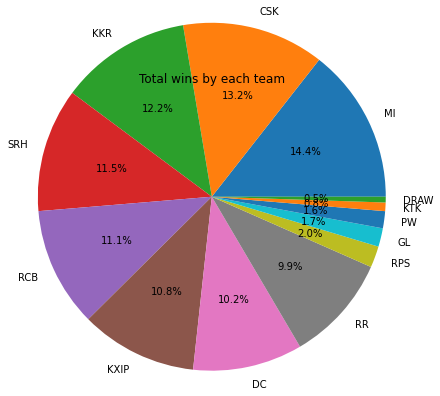

In [38]:
#plotting number of wins by each team in pie chart
teams=["MI","CSK","KKR","SRH","RCB","KXIP","DC","RR","RPS","GL","PW","KTK","DRAW"]
plt.pie(winsbyteam,labels=teams,radius=2,autopct='%0.1f%%')
plt.title("Total wins by each team")

# HYPOTHESIS TESTING

In [39]:
#Z TEST :
#Alpha level: 0.05
#Critical value of z: 1.96
print("STATEMENT OF HYPOTHESIS")
print("runs scored at first 10 overs is equal to runs scored at last 5 overs")
print("\n")

innings=2
over_1to10=deliveries[deliveries['over']<=10].groupby('match_id')[['total_runs']].sum()
over_1to10=over_1to10/innings
over_16to20=deliveries[deliveries['over']>15].groupby('match_id')[['total_runs']].sum()
o=over_1to10+over_16to20
over_16to20=(o-over_1to10)/innings
over_1to10=over_1to10.rename(columns = {'total_runs': '1 to 10'}, inplace = False)
over_16to20=over_16to20.rename(columns = {'total_runs': '16 to 20'}, inplace = False)
df = pd.concat([over_1to10, over_16to20], axis=1, join='inner')
df1=df.describe()

#means 
x1=df1.iloc[1]['1 to 10']
x2=df1.iloc[1]['16 to 20']

#standard deviations
s1=df1.iloc[2]['1 to 10']
s2=df1.iloc[2]['16 to 20']

#size of sample
n1=len(over_1to10.index)
n2=len(over_16to20.index)

#pooled variance
s=((n1-1)*pow(s1,2))+((n2-1)*pow(s2,2))/(n1+n2-2)

#Z statistic
z_critcal=1.96
z1=abs(x1-x2)/pow(pow(s,2)*((1/n1)+(1/n2)),0.5)
print("Z = ",z1)
if(z1<z_critcal):
    print("\nSince calculated z value is smaller than critical z value ,")
    print("We accept the hypothesis that runs scored at first 10 overs is equal to runs scored at last 5 overs.")
else :
    print("\nSince calculated z value is greater than critical z value ,")
    print("We reject the hypothesis that runs scored at first 10 overs is equal to runs scored at last 5 overs.")  

STATEMENT OF HYPOTHESIS
runs scored at first 10 overs is equal to runs scored at last 5 overs


Z =  0.004765708833135246

Since calculated z value is smaller than critical z value ,
We accept the hypothesis that runs scored at first 10 overs is equal to runs scored at last 5 overs.


In [40]:
print("STATEMENT OF HYPOTHESIS")
print("Winning the toss leads to the chances of winning")
print("\n")

#Values found from the dataset
x1_bar=50.4
x2_bar=50.13333
n1=15
n2=15
sig_1=35.25866324
sig_2=39.02172777

#Finding critical value for 95% confidence interval
def z_table(value):
   diff=1-(value/100)
   x=diff/2
   final=1-x
   p=norm.ppf(final)
   return p
print("Critical value of z:")
critical_z=z_table(95)
print(round(critical_z,2))

#Finding the test statistic
def z_test(x1_bar,x2_bar,n1,n2,sig_1,sig_2):
   num=(abs(x1_bar-x2_bar))
   dem=sqrt(((sig_1*2)/n1)+((sig_2*2)/n2))
   return num/dem
print("Test statistic of z:")
z_val=z_test(x1_bar,x2_bar,n1,n2,sig_1,sig_2)
print(round(z_val,2))

#Result of hypothesis
if z_val<critical_z: 
    print("We are accepting null hypothesis that winning the toss leads to the chance of winning")
else:
    print("We are rejecting null hypothesis that winning the toss leads to the chance of winning")

STATEMENT OF HYPOTHESIS
Winning the toss leads to the chances of winning


Critical value of z:
1.96
Test statistic of z:
0.08
We are accepting null hypothesis that winning the toss leads to the chance of winning


In [41]:
print("STATEMENT OF HYPOTHESIS")
print("Batting first leads to the chances of winning")
print("\n")

#Values found from the dataset
x1_bar=19.5333
x2_bar=50.13333
n1=15
n2=15
sig_1=15.76101
sig_2=39.02172777

#Finding critical value for 95% confidence interval
def z_table(value):
   diff=1-(value/100)
   x=diff/2
   final=1-x
   p=norm.ppf(final)
   return p
print("Critical value of z:")
critical_z=z_table(95)
print(round(critical_z,2))

#Finding the test statistic
def z_test(x1_bar,x2_bar,n1,n2,sig_1,sig_2):
   num=(abs(x1_bar-x2_bar))
   dem=sqrt(((sig_1*2)/n1)+((sig_2*2)/n2))
   return num/dem
print("Test statistic of z:")
z_val=z_test(x1_bar,x2_bar,n1,n2,sig_1,sig_2)
print(round(z_val,2))

#Result of hypothesis
if z_val<critical_z: 
    print("We are accepting null hypothesis that batting first leads to the chance of winning")
else:
    print("We are rejecting null hypothesis that batting first leads to the chance of winning")

STATEMENT OF HYPOTHESIS
Batting first leads to the chances of winning


Critical value of z:
1.96
Test statistic of z:
11.32
We are rejecting null hypothesis that batting first leads to the chance of winning
